In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [3]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
EPOCHS = 50
CHANNELS=3

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "data",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [5]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [6]:
len(dataset)

68

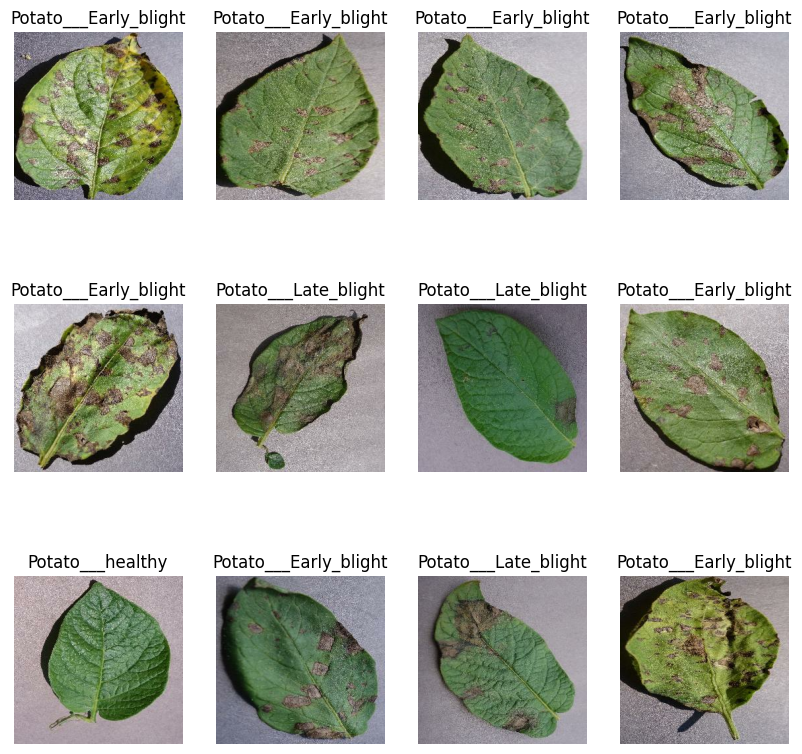

In [7]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [8]:
len(dataset)

68

In [9]:
train_size = 0.8
len(dataset) * train_size

54.400000000000006

In [10]:
train_ds = dataset.take(54)
len(train_ds)

54

In [11]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [12]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle = True, shuffle_size=10000):
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
        
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds
    

In [13]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [14]:
len(train_ds)

54

In [15]:
len(val_ds)

6

In [16]:
len(test_ds)

8

In [17]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [18]:
resize_and_rescale= tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [19]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
    
])

In [20]:
input_shape = (BATCH_SIZE, IMAGE_SIZE,IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(n_classes, activation = 'softmax'),
    
])

model.build(input_shape = input_shape)

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                  

In [22]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [23]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data = val_ds
)

Epoch 1/50
54/54 [==============================] - 27s 226ms/step - loss: 0.8855 - accuracy: 0.5168 - val_loss: 0.7649 - val_accuracy: 0.6198
Epoch 2/50
54/54 [==============================] - 11s 207ms/step - loss: 0.6399 - accuracy: 0.6840 - val_loss: 0.5738 - val_accuracy: 0.7396
Epoch 3/50
54/54 [==============================] - 10s 182ms/step - loss: 0.3808 - accuracy: 0.8275 - val_loss: 0.1951 - val_accuracy: 0.9271
Epoch 4/50
54/54 [==============================] - 10s 186ms/step - loss: 0.4589 - accuracy: 0.8084 - val_loss: 0.8583 - val_accuracy: 0.6302
Epoch 5/50
54/54 [==============================] - 10s 187ms/step - loss: 0.5167 - accuracy: 0.7772 - val_loss: 0.3976 - val_accuracy: 0.8542
Epoch 6/50
54/54 [==============================] - 10s 193ms/step - loss: 0.3541 - accuracy: 0.8461 - val_loss: 0.4142 - val_accuracy: 0.8646
Epoch 7/50
54/54 [==============================] - 11s 196ms/step - loss: 0.3046 - accuracy: 0.8715 - val_loss: 0.2170 - val_accuracy: 0.9010

54/54 [==============================] - 13s 236ms/step - loss: 0.0294 - accuracy: 0.9896 - val_loss: 0.0445 - val_accuracy: 0.9792
Epoch 42/50
54/54 [==============================] - 13s 243ms/step - loss: 0.0445 - accuracy: 0.9861 - val_loss: 0.0493 - val_accuracy: 0.9740
Epoch 43/50
54/54 [==============================] - 13s 245ms/step - loss: 0.0238 - accuracy: 0.9907 - val_loss: 0.1823 - val_accuracy: 0.9479
Epoch 44/50
54/54 [==============================] - 13s 234ms/step - loss: 0.0288 - accuracy: 0.9913 - val_loss: 0.0264 - val_accuracy: 0.9896
Epoch 45/50
54/54 [==============================] - 12s 230ms/step - loss: 0.0102 - accuracy: 0.9954 - val_loss: 0.0456 - val_accuracy: 0.9792
Epoch 46/50
54/54 [==============================] - 13s 240ms/step - loss: 0.0393 - accuracy: 0.9850 - val_loss: 0.1229 - val_accuracy: 0.9479
Epoch 47/50
54/54 [==============================] - 12s 231ms/step - loss: 0.0755 - accuracy: 0.9757 - val_loss: 0.0458 - val_accuracy: 0.9792
Epoc

In [25]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 6s 28ms/step - loss: 0.1017 - accuracy: 0.9688


In [26]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [27]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [28]:
 acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

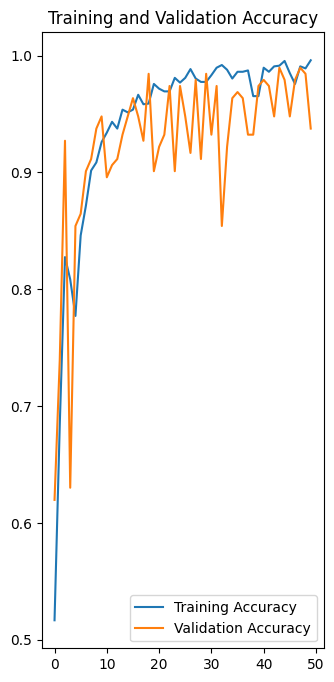

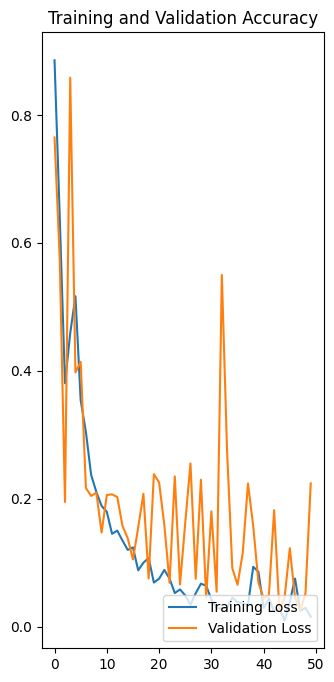

In [34]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc, label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.figure(figsize = (8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

first image to predict
first images actual label: Potato___Early_blight
1/1 [==============================] - 0s 49ms/step
Potato___Early_blight


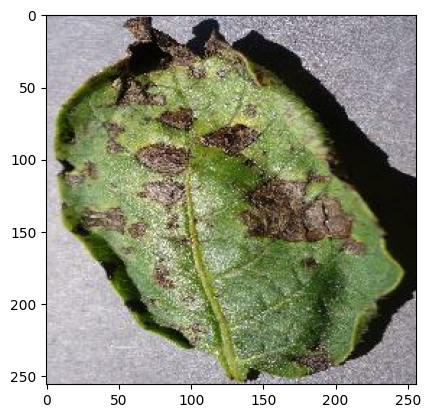

In [43]:
import numpy as np
for image_batch, label_batch in test_ds.take(1):
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = label_batch[0]
    
    print("first image to predict")
    plt.imshow(first_image)
    print("first images actual label:", class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print( class_names[np.argmax(batch_prediction[0])])
    

In [65]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 18ms/step


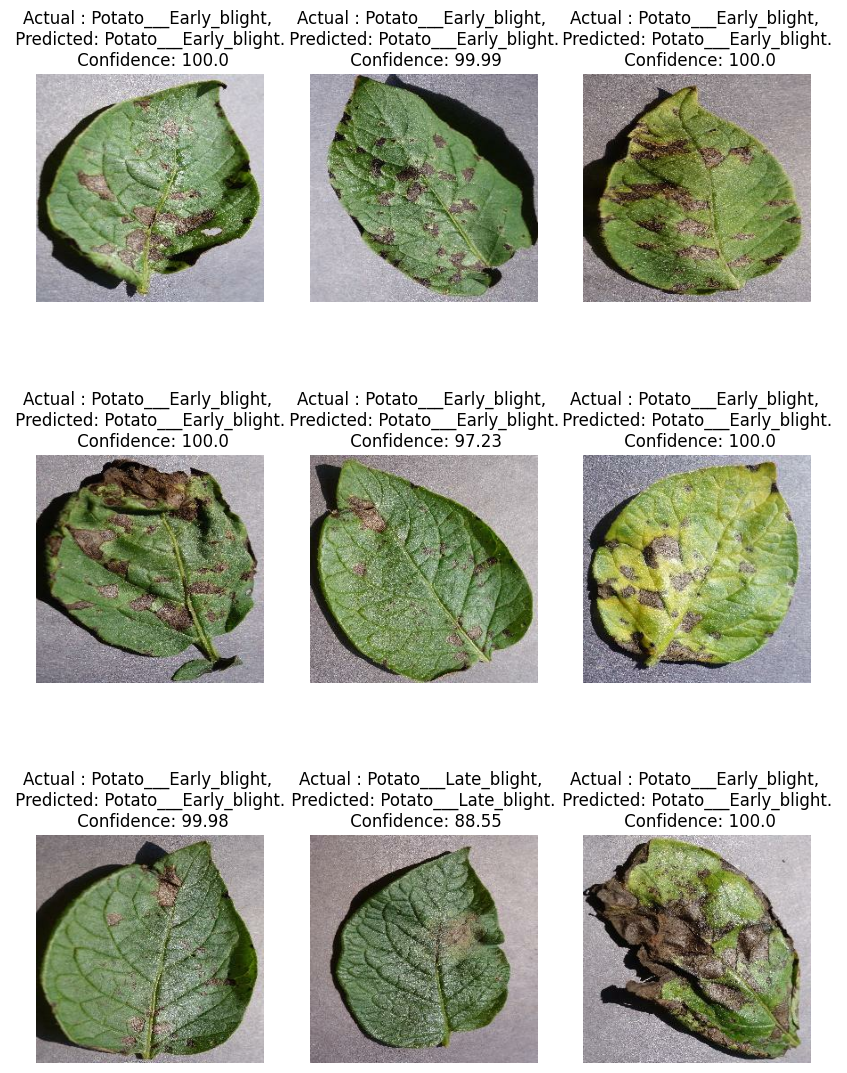

In [69]:
import numpy as np
plt.figure(figsize = (10,14))
for images, labels in test_ds.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual : {actual_class}, \n Predicted: {predicted_class}. \n Confidence: {confidence}")
        plt.axis('off')
        

In [70]:
model_version = 1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/1\assets


INFO:tensorflow:Assets written to: ../models/1\assets


In [72]:
!pip install uvicorn

  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
     ---------------------------------------- 0.0/58.3 kB ? eta -:--:--
     ---------------------------------------- 0.0/58.3 kB ? eta -:--:--
     ------- -------------------------------- 10.2/58.3 kB ? eta -:--:--
     -------------------------- ----------- 41.0/58.3 kB 393.8 kB/s eta 0:00:01
     -------------------------------------- 58.3/58.3 kB 440.5 kB/s eta 0:00:00
   ---------------------------------------- 0.0/60.7 kB ? eta -:--:--
   --------------------------------- ------ 51.2/60.7 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 60.7/60.7 kB 1.1 MB/s eta 0:00:00
Using cached click-8.1.7-py3-none-any.whl (97 kB)
